<a href="https://colab.research.google.com/github/lima-breno/natural_language_processing/blob/main/Pre_processamento_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pré-processamento

Notebook para pré-processamento de dados textuais

## Carregando pacotes iniciais

In [ ]:
!pip install unidecode==1.2.0
!pip install wikipedia==1.4.0
!pip install spacy==2.2.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.7/241.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=100f211df0f5acf14ded7ce4f13a9e78062c09c5708c86ff0500d037f99489c0
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 13.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely no

In [ ]:
import nltk
import wikipedia
import re
import spacy
from nltk.probability import FreqDist
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

## Carregando dados da wikipedia

In [ ]:
wikipedia.set_lang("pt")
pln = wikipedia.page("PLN")
corpus = pln.content

In [ ]:
type(corpus)

str

In [ ]:
print(corpus)

Processamento de língua natural (PLN) é uma subárea da ciência da computação, inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas naturais. Sistemas de geração de língua natural convertem informação de bancos de dados de computadores em linguagem compreensível ao ser humano e sistemas de compreensão de língua natural convertem ocorrências de linguagem humana em representações mais formais, mais facilmente manipuláveis por programas de computador. Alguns desafios do PLN são compreensão de língua natural, fazer com que computadores extraiam sentido de linguagem humana ou natural e geração de língua natural.


== História ==
A história do PLN começou na década de 1950, quando Alan Turing publicou o artigo "Computing Machinery and Intelligence", que propunha o que agora é chamado de teste de Turing como critério de inteligência.
Em 1954, a experiência de Georgetown envolveu a tradução automática de mais de sessenta frases 

In [ ]:
print("O texto que estamos utilizando é da URL",pln.url)

O texto que estamos utilizando é da URL https://pt.wikipedia.org/wiki/Processamento_de_linguagem_natural


## Tokenização

Primeiro pré-processamento é de tokenização. Consideramos tokens o menor nível de representação do texto; por exemplo palavras.

Abaixo são apresentado três metodologias para tokenização.

1. Utilizando a função split, usualmente tokenizamos usando o espaço para quebrar os tokens.
2. Utilizando regex
Na regex usada de exemplo '\w+(?:'\w+)?|[^\w\s]' onde temos um grupo de caracter alfanumerico, podendo ou não ter apostofro, seguido de alfanumerico ou um grupo com caracter que não é alfanumerico e nem espaçamento.
3. Utilizando a função  word_tokenize do nltk

In [ ]:
tokens_split = corpus.split(" ")
len(tokens_split), len(set(tokens_split))

(4071, 1609)

In [ ]:
tokens_regex = re.findall(r"\w+(?:'\w+)?|[^\w\s]", corpus)
len(tokens_regex), len(set(tokens_regex))

(4954, 1461)

In [ ]:
tokens_nltk = nltk.word_tokenize(corpus, language='portuguese')
len(tokens_nltk), len(set(tokens_nltk))

(4828, 1447)

In [ ]:
# Função para plotar as 20 palavras mais frequentes
def plot_frequencia_tokens(tokens):
    fd_words = FreqDist(tokens)
    fd_words.plot(20)

In [ ]:
corpus[:40]

'Processamento de língua natural (PLN) é '

In [ ]:
tokens_split[:10]

['Processamento',
 'de',
 'língua',
 'natural',
 '(PLN)',
 'é',
 'uma',
 'subárea',
 'da',
 'ciência']

In [ ]:
tokens_regex[:10]

['Processamento',
 'de',
 'língua',
 'natural',
 '(',
 'PLN',
 ')',
 'é',
 'uma',
 'subárea']

OBS: pro Regex, o ( é considerado uma palavra só. Por isso dá diferença na qtd quando comparado com o split.

O mesmo vale para a pontuação. NOs gráficsos abaixo é possível ver a contagem dos termos, como ela é diferente

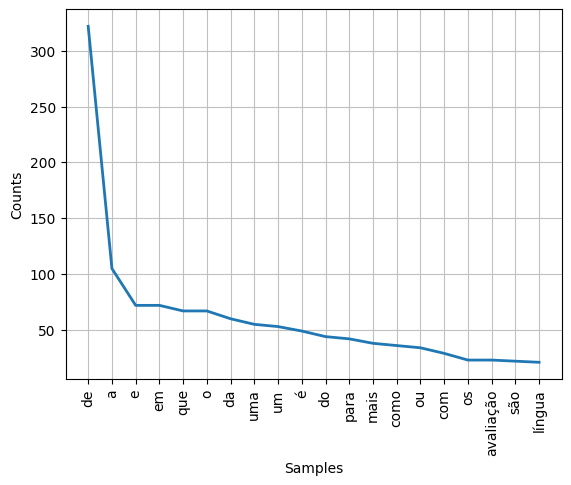

In [ ]:
plot_frequencia_tokens(tokens_split)

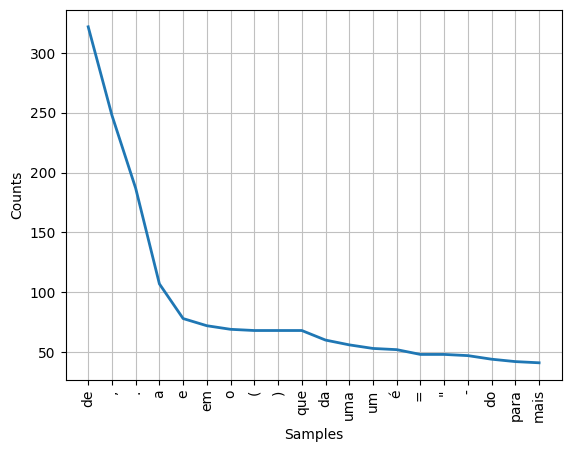

In [ ]:
plot_frequencia_tokens(tokens_regex)

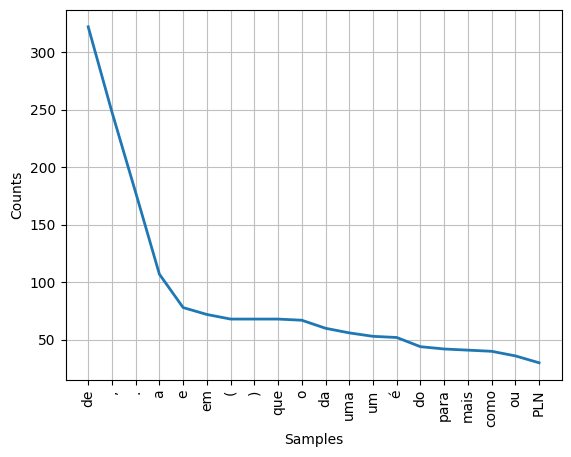

In [ ]:
plot_frequencia_tokens(tokens_nltk)

no regex, o == (juntos) ele considera separado. para o NLTK, ele considera um conjunto '=='

In [ ]:
#Identificando as palavras que começam com (
    ##Isso poderá ser aplicado para poder diminuir a difenreça entre as contagens de elementos entre split e nltk
[token for token in tokens_split if token.startswith('(')]

['(PLN)',
 '(SCHANK,',
 '(CULLINGFORD,',
 '(WILENSKY,',
 '(MEEHAN,',
 '(LEHNERT,',
 '(CARBONELL,',
 '(LEHNERT,',
 '(aprendizado',
 '(ver',
 '(como',
 '(part-of-speech',
 '(como',
 '(e',
 '(incluindo,',
 '(aprendizado',
 '(ou',
 '(muitas',
 '(plural',
 '(ou',
 '(por',
 '(por',
 '(NLL)',
 '("menções")',
 '("entidades").',
 '(ao',
 '(por',
 '(por',
 '(gramática,',
 '(isto',
 '(por',
 '(NER)\n\nDado',
 '(por',
 '(por',
 '(CWA)',
 '(OCR)\n\nDada',
 '("the',
 '("book',
 '(Parsing)\n\nDetermina',
 '(análise',
 '(a',
 '(como',
 '(como',
 '(por',
 '(sentence',
 '(sentiment',
 '(IR)\n\nTrata-se',
 '(mais',
 '(por',
 '(IE)\n\nTrata-se,',
 '(1984-1988),',
 '(incluindo',
 '(Pallet,',
 '(Black',
 '(Hirschman',
 '(inglês,',
 '(Adda',
 '(final',
 '(POS).',
 '(ver',
 '(NLTK):',
 '(LDA)\nIndexação',
 '(linguística)\nDobradura',
 '(2009).',
 '(2008).',
 '(2008).',
 '(1999).',
 '(1989).']

In [ ]:
len(set(tokens_split)), len(set(tokens_regex)), len(set(tokens_nltk))

(1609, 1461, 1447)

## Remoção de stopWords

Para remover stopword utilizaremos as palavras já definidas no pacote stopwords; para remover as stopwords iremos validar qual token não esta no conjunto de stopwords.

In [ ]:
from nltk.corpus import stopwords
portugues_stops = stopwords.words('portuguese')

In [ ]:
print(portugues_stops)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [ ]:
len(portugues_stops)

207

In [ ]:
tokens_sem_stop = [t for t in tokens_nltk if t not in portugues_stops]

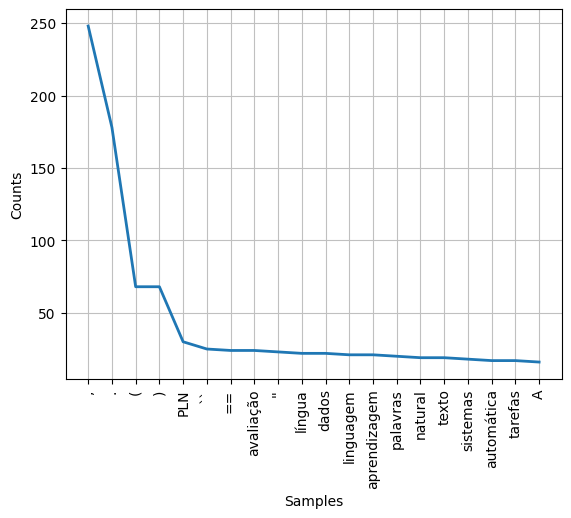

In [ ]:
plot_frequencia_tokens(tokens_sem_stop)

In [ ]:
len(set(tokens_sem_stop))
#aqui passou de 1477 tokens para 1366, diminuiu o vocabulário a ser analisado, mas ainda tem o A (maiúsculo- necessário mexer na capitalização)

1366

## Capitalização
Para esse processo iremos passar as letras para minusculo ou maiusculo, para isso usaremos as funções do python (.lower() e .upper())

In [ ]:
tokens = [t.lower() for t in tokens_sem_stop]

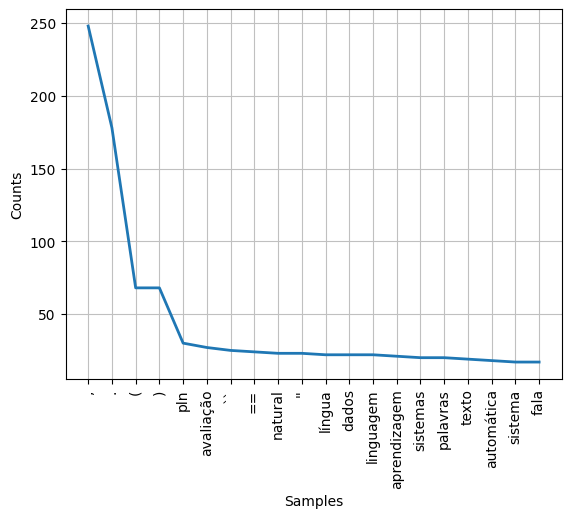

In [ ]:
plot_frequencia_tokens(tokens)

In [ ]:
len(set(tokens))
#Aqui já teve uma outra diminuição, passando de 1366 para 1302, e no grafico já é possívl verificar que n tem o A (maiusculo)

1302

## Remoção de números
Para remover ou substituir números iremos usar a função sub de re; esse processamento pode ser feito antes ou depois da tokenização.

In [ ]:
#O comando abaixo vai substituir os dígitos por vazios, sumindo da lista
tokens_sem_numbers = [re.sub(r'\d', '', t) for t in tokens]

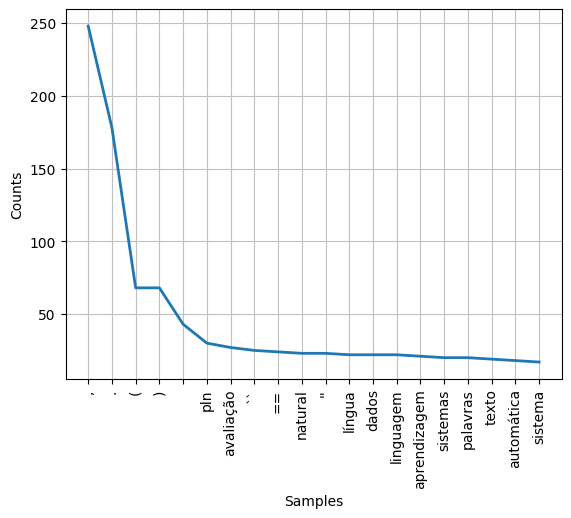

In [ ]:
plot_frequencia_tokens(tokens_sem_numbers)

In [ ]:
len(set(tokens_sem_numbers))

## Remoção de pontos
Para remoção iremos criar um conjunto de strings que representam pontos, para obter esse conjunto iremos usar o objeto punctuation do pacote string

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
tokens_sem_punction = [t for t in tokens_sem_numbers if t not in string.punctuation]

#Aqui ele n vai pegear pontos que estão juntos por exemplo "Breno," ou "--" ou "=="

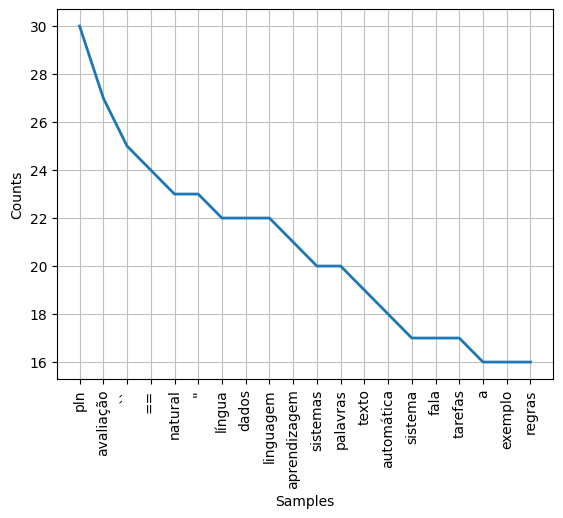

In [ ]:
plot_frequencia_tokens(tokens_sem_punction)

In [ ]:
len(set(tokens_sem_punction))

1253

## Remoção de acentos
Para a remoção de acentos iremos usar a função unidecode do pacote unidecode. Essa função será utilizada em cada token.

In [ ]:
from unidecode import unidecode

In [ ]:
unidecode('é')

'e'

In [ ]:
tokens_sem_acentos = [unidecode(t) for t in tokens_sem_punction]

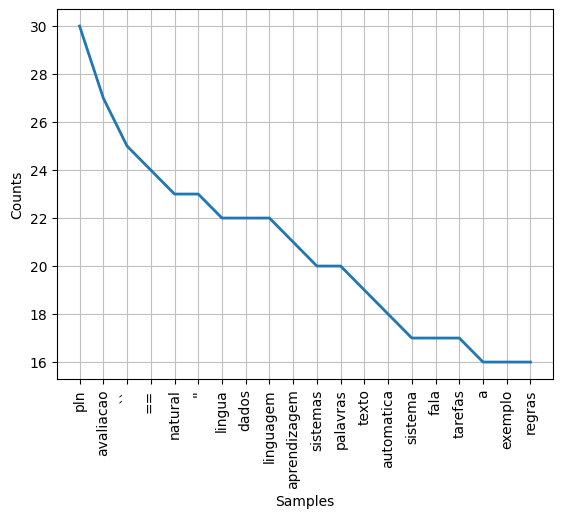

In [ ]:
plot_frequencia_tokens(tokens_sem_acentos)

In [ ]:
len(set(tokens_sem_acentos))

1251

abaixo foi feita a alteração da ordem da tokenização, e é possível verificar que houve uma diminuição de 1251 (feito nos passos anteriores) para 1225

In [ ]:
def pre_processament(tokens):
    tokens = [t.lower() for t in tokens]
    tokens = [re.sub(r'\d', '', t) for t in tokens]
    tokens = [t for t in tokens if t not in string.punctuation]
    tokens = [t for t in tokens if t not in portugues_stops]
    tokens = [unidecode(t) for t in tokens]
    print(f'Tamanho do vocabulario :{len(set(tokens))}')
    plot_frequencia_tokens(tokens)

Tamanho do vocabulario :1225


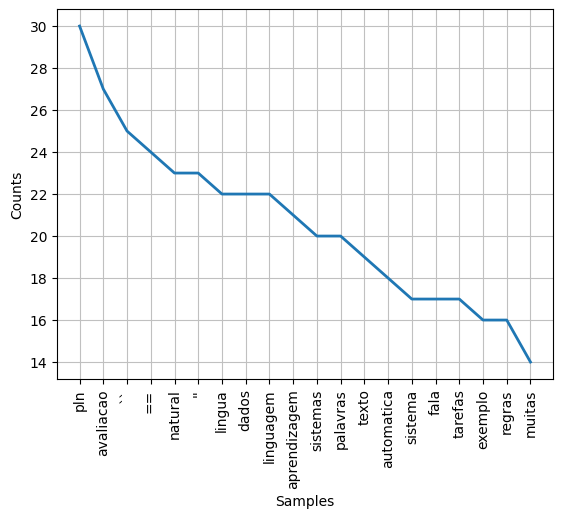

In [ ]:
pre_processament(tokens_nltk)

OU SEJA, a ordem em que vc faz a tokenização altera a quantidade final de palavras que ficam. ISSO QUER DIZER QUE LEVA TEMPO ATÉ VC CONSEGUIR ENCONTRAR UMA ORDEM MAIS ADEQUADA!

## Stemming

Para realizar stemming será usado o modelo do pacote nltk. Lembrando que será criado palavras que podem não existir.

In [ ]:
stemmer = nltk.stem.RSLPStemmer()

In [ ]:
tokens_sem_acentos[15]

'linguas'

In [ ]:
stemmer.stem('linguas')

'lingu'

In [ ]:
tokens_stemmer = [stemmer.stem(t) for t in tokens_sem_acentos]

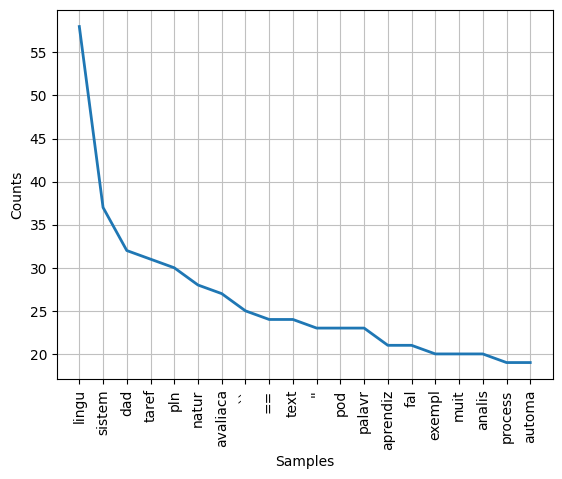

In [ ]:
plot_frequencia_tokens(tokens_stemmer)

In [ ]:
len(set(tokens_stemmer))

939

Aqui é possível ver que a qtd de vocabulário já reduziu BASTANTE! Quando comparado com o processo de tokenização

Abaixo é possível ver a palavra raiz e como fica a steeming

In [ ]:
[(t_1, t_2) for t_1, t_2 in zip(tokens_sem_acentos, tokens_stemmer) if t_1!=t_2][:20]

[('processamento', 'process'),
 ('lingua', 'lingu'),
 ('natural', 'natur'),
 ('subarea', 'subare'),
 ('ciencia', 'cienc'),
 ('computacao', 'computaca'),
 ('inteligencia', 'inteligenc'),
 ('artificial', 'artific'),
 ('linguistica', 'linguis'),
 ('estuda', 'estud'),
 ('problemas', 'problem'),
 ('geracao', 'geraca'),
 ('compreensao', 'compreensa'),
 ('automatica', 'automa'),
 ('linguas', 'lingu'),
 ('humanas', 'human'),
 ('naturais', 'natur'),
 ('sistemas', 'sistem'),
 ('geracao', 'geraca'),
 ('lingua', 'lingu')]

## Lemmanization

Para realizar lemmanization temos que carregar o modelo a ser usada para isso usaremos os modelos disponiveis no pacote [spaCy](https://spacy.io/). Para o exemplo usaremos o modelo [pt_core_news_sm](https://spacy.io/models/pt#pt_core_news_sm)

In [ ]:
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 65.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load("pt_core_news_sm")

In [ ]:
str_tokens = ' '.join(tokens_sem_acentos)
str_tokens

"processamento lingua natural pln subarea ciencia computacao inteligencia artificial linguistica estuda problemas geracao compreensao automatica linguas humanas naturais sistemas geracao lingua natural convertem informacao bancos dados computadores linguagem compreensivel humano sistemas compreensao lingua natural convertem ocorrencias linguagem humana representacoes formais facilmente manipulaveis programas computador alguns desafios pln compreensao lingua natural fazer computadores extraiam sentido linguagem humana natural geracao lingua natural == historia == a historia pln comecou decada alan turing publicou artigo `` computing machinery and intelligence '' propunha agora chamado teste turing criterio inteligencia em experiencia georgetown envolveu traducao automatica sessenta frases russas ingles os autores afirmaram dentro tres cinco anos traducao automatica problema resolvido no entanto avancos reais lentos previsto apos relatorio alpac constatou pesquisa dez anos conseguiu sati

In [ ]:
doc = nlp(str_tokens)

In [ ]:
token_lemm = [token.lemma_ for token in doc]

In [ ]:
token_lemm[:20]

['processamento',
 'lingua',
 'natural',
 'pln',
 'subareo',
 'ciencia',
 'computacao',
 'inteligencio',
 'artificial',
 'linguistico',
 'estudar',
 'problema',
 'geracao',
 'compreensaor',
 'automatica',
 'lingua',
 'humano',
 'natural',
 'sistema',
 'geracao']

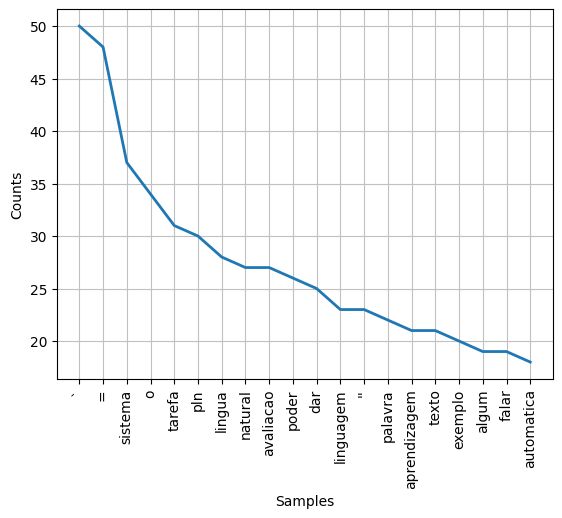

In [ ]:
plot_frequencia_tokens(token_lemm)

In [ ]:
len(set(token_lemm))

1089

Aqui ele reduz um pouco menos que o stemming!

Abaixo é demonstrado o que acabou alterando na palavra inicial

In [ ]:
[(t_1, t_2) for t_1, t_2 in zip(tokens_sem_acentos, token_lemm) if t_1!=t_2][:20]

[('subarea', 'subareo'),
 ('inteligencia', 'inteligencio'),
 ('linguistica', 'linguistico'),
 ('estuda', 'estudar'),
 ('problemas', 'problema'),
 ('compreensao', 'compreensaor'),
 ('linguas', 'lingua'),
 ('humanas', 'humano'),
 ('naturais', 'natural'),
 ('sistemas', 'sistema'),
 ('convertem', 'converter'),
 ('bancos', 'banco'),
 ('dados', 'dar'),
 ('computadores', 'computador'),
 ('sistemas', 'sistema'),
 ('convertem', 'converter'),
 ('ocorrencias', 'ocorrencio'),
 ('humana', 'humano'),
 ('formais', 'formal'),
 ('manipulaveis', 'manipulavel')]

Tem que tomar cuidado, pois eles podem ter mexido no dicionario e o processo pode retornar uma palavra n muito certa. Ex: Inteligência -> inteligencio, compressao -> compressaor

dados ele considera a flexao do verbo. Por isso ele retorna "dar"

Abaixo é possível verificar que stemming, lemmetização e tokenizaçãon geram tanta diferença assim entre o vocabulari gerado.


NOTA: Dados no stemming fica dad, enquanto a lemmetização fica dar, e tokenizaçã n altera

In [ ]:
[(t_1, t_2, t_3) for t_1, t_2, t_3 in zip(tokens_stemmer, token_lemm, tokens_sem_acentos) if t_1!=t_2][:30]

[('process', 'processamento', 'processamento'),
 ('lingu', 'lingua', 'lingua'),
 ('natur', 'natural', 'natural'),
 ('subare', 'subareo', 'subarea'),
 ('cienc', 'ciencia', 'ciencia'),
 ('computaca', 'computacao', 'computacao'),
 ('inteligenc', 'inteligencio', 'inteligencia'),
 ('artific', 'artificial', 'artificial'),
 ('linguis', 'linguistico', 'linguistica'),
 ('estud', 'estudar', 'estuda'),
 ('problem', 'problema', 'problemas'),
 ('geraca', 'geracao', 'geracao'),
 ('compreensa', 'compreensaor', 'compreensao'),
 ('automa', 'automatica', 'automatica'),
 ('lingu', 'lingua', 'linguas'),
 ('human', 'humano', 'humanas'),
 ('natur', 'natural', 'naturais'),
 ('sistem', 'sistema', 'sistemas'),
 ('geraca', 'geracao', 'geracao'),
 ('lingu', 'lingua', 'lingua'),
 ('natur', 'natural', 'natural'),
 ('convert', 'converter', 'convertem'),
 ('informaca', 'informacao', 'informacao'),
 ('banc', 'banco', 'bancos'),
 ('dad', 'dar', 'dados'),
 ('comput', 'computador', 'computadores'),
 ('lingu', 'linguagem

## Unificando os processamentos

In [ ]:
def pre_processamento(texto):
    texto = texto.lower()
    tokens = texto.split(" ")
    tokens = [unidecode(t) for t in tokens]
    tokens = [t for t in tokens if t not in portugues_stops]
    tokens = [t for t in tokens if t not in string.punctuation]
    str_tokens = ' '.join(tokens)
    doc = nlp(str_tokens)
    tokens = [token.lemma_ for token in doc]
    return tokens

tokens = pre_processamento(corpus)
len(tokens), len(set(tokens))

(3459, 1131)

O processo de lemmatização separa a pontuação depois da tokenização feita antes, aí considera a pontuação tb.

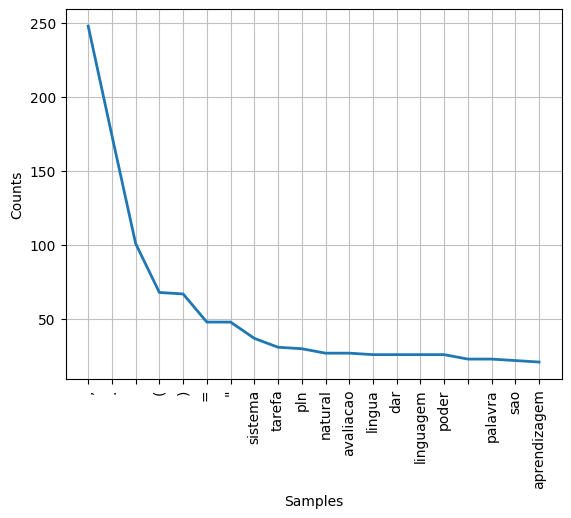

In [ ]:
plot_frequencia_tokens(tokens)